In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


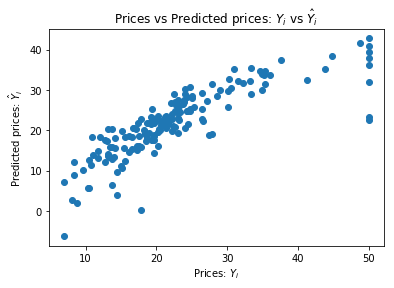

In [15]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


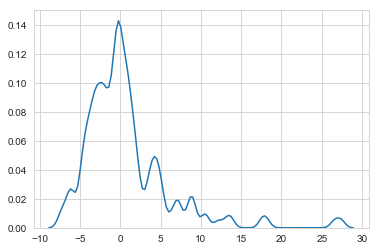

In [16]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

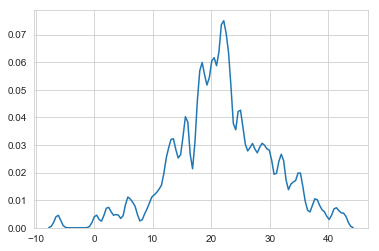

In [17]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [19]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(loss='squared_loss')
sgd.fit(X_train,Y_train)

y_pred = sgd.predict(X_test)

c:\users\aditya pandey\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [20]:
from sklearn.metrics import mean_squared_error

test_err = mean_squared_error(Y_test,y_pred)

print("Test error =",test_err)

Test error = 31.6951307576609


In [21]:
# Predicting

def predict(row,coefficients):
    y_dash = coefficients[0]
    for i in range(len(row)-1):
        y_dash += coefficients[i+1] * row[i]
    return y_dash

# estimating coefficients using SGD

def coeff(data_X,data_Y,step_size,n_epochs):
    coef = np.random.rand(len(data_X[0])+1)
    for epoch in range(n_epochs):
        err_sum = 0
        j=0
        for row in data_X:
            y_dash = predict(row,coef)
            err = data_Y.iloc[j] - y_dash
          #  err_sum += err**2
            coef[0] = coef[0] + step_size * err
            j=j+1
            for i in range(len(row)-1):
                coef[i+1] = coef[i+1] + step_size * err * row[i]
        
        print('# of epoch=%d, step_size=%.3f, Squared_error=%.3f' % (epoch, step_size, err))
    

    return coef

In [22]:
step_size = 0.0001
n_epochs = 150
#X_data = np.random.rand(X_train)
coef = coeff(X_train,Y_train, step_size, n_epochs)
print(coef)

# of epoch=0, step_size=0.000, Squared_error=19.836
# of epoch=1, step_size=0.000, Squared_error=17.987
# of epoch=2, step_size=0.000, Squared_error=16.417
# of epoch=3, step_size=0.000, Squared_error=15.080
# of epoch=4, step_size=0.000, Squared_error=13.936
# of epoch=5, step_size=0.000, Squared_error=12.955
# of epoch=6, step_size=0.000, Squared_error=12.108
# of epoch=7, step_size=0.000, Squared_error=11.375
# of epoch=8, step_size=0.000, Squared_error=10.736
# of epoch=9, step_size=0.000, Squared_error=10.176
# of epoch=10, step_size=0.000, Squared_error=9.683
# of epoch=11, step_size=0.000, Squared_error=9.246
# of epoch=12, step_size=0.000, Squared_error=8.857
# of epoch=13, step_size=0.000, Squared_error=8.508
# of epoch=14, step_size=0.000, Squared_error=8.194
# of epoch=15, step_size=0.000, Squared_error=7.908
# of epoch=16, step_size=0.000, Squared_error=7.648
# of epoch=17, step_size=0.000, Squared_error=7.409
# of epoch=18, step_size=0.000, Squared_error=7.188
# of epoch=1

In [23]:
predictions=[]
for i in range(len(X_test)):
    pred = predict(X_test[i],coef)
    predictions.append(pred)

In [24]:
test_err = mean_squared_error(Y_test,predictions)

print("Test error = %.3f"%(test_err))

Test error = 36.753


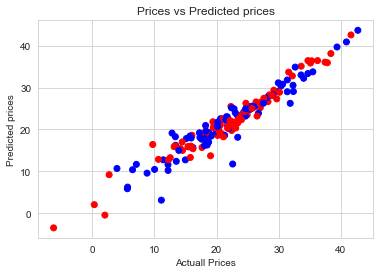

In [26]:
plt.scatter(Y_pred,predictions,color=['red','blue'])
plt.xlabel("Actuall Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

Observations and summary ->

From this plot we can observe that,red points are prediction points using SGDRegressor and green points are from my own SGD function uisng finding optimal coefficients.

If we observe them both are almost in the same line, if they match exactly both are absoluetly same. but here they are almost same means giving error nearly same.